## Business Understanding

Season/Genre: Which time of year do different genres do well?

Currency: Budget and Gross(Domestic); Adjusted for Inflation?
ROI: Gross(Domestic)/Budget; 
Budget Mean:  4.187333e+07
Budget Median: 
Filtering Conditions: 
    Medium Budget(To be researched)
    Last 20 years
    

### Data Understanding

## Data Exploration

In [2]:
#imports
import numpy as np
import pandas as pd 
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Rotten Tomatoes (Marlo)

In [2]:
rt_info = pd.read_csv('Data/rt.movie_info.tsv.gz', sep='\t', encoding='latin')

In [3]:
rt_review = pd.read_csv('Data/rt.reviews.tsv.gz', sep='\t', encoding='latin')

In [4]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
rt_info['runtime'].value_counts

<bound method IndexOpsMixin.value_counts of 0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object>

In [7]:
sum(rt_info['theater_date'].isna())

359

In [8]:
rt_review.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [10]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### The Numbers (Andy)

In [162]:
#read in the file
tn_raw_df = pd.read_csv("data/tn.movie_budgets.csv.gz")

In [163]:
tn_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [164]:
tn_raw_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Clean data so that release_date and movie are strings, and production_budget, domestic_gross, worldwide_gross are integers

In [165]:
#run this cell only once
#production budget to int
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].str.replace("$",'').str.replace(",",'')
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].astype(int)

#domestic gross to int
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].astype(int)

#worldwide_gross to int
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].astype('int64')

tn_df = tn_raw_df.copy()

In [166]:
tn_df.describe()
tn_df.median()

id                         50.0
production_budget    17000000.0
domestic_gross       17225945.0
worldwide_gross      27984448.5
dtype: float64

In [167]:
tn_df.sort_values(by="domestic_gross", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
...,...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,20000000,0,5918742
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,20000000,0,22139590
2707,8,"Dec 31, 2012",Zambezia,20000000,0,34454336
2706,7,"Dec 31, 2008",Admiral,20000000,0,38585047


box office mojo domestic gross for star wars ep 7: 936700000.0
the numbers domestic gross for star wars ep 7: 936662225

In [192]:
tn_df.loc[tn_df['movie'] == "Titanic"]
bom_raw_df.loc[bom_raw_df['title'] == "Jaws"]

,title,studio,domestic_gross,foreign_gross,year


tn_db domestic gross: 198 680 470
tn_db worldwide gross: 390 525 192

bom lifetime gross: 200,882,193	
bom adjusted for inflation gross: 1,850,581,586	

In [168]:
tn_df.sort_values(by="production_budget", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


### Box Office Mojo (Andy)

In [169]:
#read in data from box office mojo
bom_raw_df = pd.read_csv('data/bom.movie_gross.csv.gz')

In [170]:
bom_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [189]:
bom_raw_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [194]:
bom_raw_df.sort_values(by="domestic_gross", ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [173]:
bom_raw_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [ ]:
bom_raw_df['foreign_gross'].isna().value_counts()

In [ ]:
bom_raw_df['studio'].value_counts()

### TheMovieDB (John)

rt_info = pd.read_csv('Data/rt.movie_info.tsv.gz', sep='\t', encoding='latin')

In [4]:
rt_review = pd.read_csv('Data/rt.reviews.tsv.gz', sep='\t', encoding='latin')

In [5]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
rt_info['runtime'].value_counts

<bound method IndexOpsMixin.value_counts of 0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object>

In [8]:
sum(rt_info['theater_date'].isna())

359

In [9]:
rt_review.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [10]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### The Numbers (Andy)

In [11]:
#read in the file
tn_raw_df = pd.read_csv("data/tn.movie_budgets.csv.gz", parse_dates=['release_date'])

In [12]:
tn_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [13]:
tn_raw_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Clean data so that release_date and movie are strings, and production_budget, domestic_gross, worldwide_gross are integers

In [14]:
#run this cell only once
#production budget to int
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].str.replace("$",'').str.replace(",",'')
tn_raw_df['production_budget'] = tn_raw_df["production_budget"].astype(int)

#domestic gross to int
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['domestic_gross'] = tn_raw_df["domestic_gross"].astype(int)

#worldwide_gross to int
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].str.replace("$",'').str.replace(",",'')
tn_raw_df['worldwide_gross'] = tn_raw_df["worldwide_gross"].astype('int64')

tn_df = tn_raw_df.copy()

In [15]:
tn_df.describe()
tn_df.median()

id                         50.0
production_budget    17000000.0
domestic_gross       17225945.0
worldwide_gross      27984448.5
dtype: float64

In [16]:
tn_df.sort_values(by="release_date", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,150000000,0,0
1205,6,2020-12-31,Hannibal the Conqueror,50000000,0,0
535,36,2020-02-21,Call of the Wild,82000000,0,0
480,81,2019-12-31,Army of the Dead,90000000,0,0
3515,16,2019-12-31,Eli,11000000,0,0
...,...,...,...,...,...,...
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5523,24,1916-09-05,Intolerance,385907,0,0


box office mojo domestic gross for star wars ep 7: 936700000.0
the numbers domestic gross for star wars ep 7: 936662225

In [17]:
#tn_df.loc[tn_df['movie'] == "Titanic"]
#bom_raw_df.loc[bom_raw_df['title'] == "Jaws"]

tn_db domestic gross: 198 680 470
tn_db worldwide gross: 390 525 192

bom lifetime gross: 200,882,193	
bom adjusted for inflation gross: 1,850,581,586	

In [18]:
tn_df.sort_values(by="production_budget", ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


### Inflation Calculations:
- Source: https://data.bls.gov/cgi-bin/cpicalc.pl

In [19]:
#Create column ROI which is domestic_gross / production_budget 
tn_df['ROI'] = tn_df['domestic_gross'] / tn_df["production_budget"]

In [20]:
### INFLATION CALCULATIONS
# Create release_year from release_date
tn_df['release_year'] = pd.DatetimeIndex(tn_df['release_date']).year

In [21]:
#Only take movies from 2010 onwards
tn_df = tn_df[tn_df["release_date"] >= "2010"]

In [22]:
#Create inflation_ratios which is then used to map release_year to create a column inflation_ratios
#which is a column that has the dollar to a 2023 ratio
tn_df['inflation_ratio'] = 1

inflation_ratios = {
    2010: 1.42,
    2011: 1.40,
    2012: 1.36,
    2013: 1.34,
    2014: 1.32,
    2015: 1.32,
    2016: 1.30,
    2017: 1.27,
    2018: 1.24,
    2019: 1.22,
    2020: 1.19
}

tn_df['inflation_ratio'] = tn_df['release_year'].replace(inflation_ratios)
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year,inflation_ratio
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.587101,2011,1.40
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.122178,2019,1.22
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1.388403,2015,1.32
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1.956408,2017,1.27
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,3.060988,2015,1.32


In [23]:
#Create Column DG_AI which means domestic gross after inflation
#And a Column PB_AI which is production budget after inflation
tn_df['DG_AI']=tn_df["domestic_gross"]*tn_df["inflation_ratio"]
tn_df["PB_AI"]=tn_df["production_budget"]*tn_df["inflation_ratio"]

In [24]:
## CREATING COLUMN FOR SEASONS
tn_df["release_month"] = pd.DatetimeIndex(tn_df["release_date"]).month

seasons = {
    1:"Winter",
    2:"Winter",
    3:"Spring",
    4:"Spring",
    5:"Spring",
    6:"Summer",
    7:"Summer",
    8:"Summer",
    9:"Fall",
    10:"Fall",
    11:"Fall",
    12:"Winter"
}

tn_df['season'] = tn_df['release_month'].map(seasons)

In [25]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year,inflation_ratio,DG_AI,PB_AI,release_month,season
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,0.587101,2011,1.40,3.374894e+08,574840000.0,5,Spring
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.122178,2019,1.22,5.217007e+07,427000000.0,6,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1.388403,2015,1.32,6.058877e+08,436392000.0,5,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1.956408,2017,1.27,7.876304e+08,402590000.0,12,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,3.060988,2015,1.32,1.236394e+09,403920000.0,12,Winter


### Box Office Mojo (Andy)

In [26]:
#read in data from box office mojo
bom_raw_df = pd.read_csv('data/bom.movie_gross.csv.gz')

In [27]:
bom_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [28]:
bom_raw_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [29]:
bom_raw_df.sort_values(by="domestic_gross", ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [30]:
bom_raw_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [31]:
bom_raw_df['foreign_gross'].isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [32]:
bom_raw_df['studio'].value_counts()

IFC         166
Uni.        147
WB          140
Fox         136
Magn.       136
           ... 
UEP           1
MPFT          1
DF            1
RLJ           1
Blue Fox      1
Name: studio, Length: 257, dtype: int64

### TheMovieDB (John)

Reading in the TheMovieDB file and looking at the data.

In [33]:
df_tmdb = pd.read_csv("data/tmdb.movies.csv.gz", parse_dates=['release_date'])

In [34]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [36]:
df_tmdb.describe(include="all")

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517.00000,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,NaN,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,NaN,[99],NaN,en,Eden,NaN,2010-01-01 00:00:00,Eden,NaN,NaN
freq,NaN,3700,NaN,23291,7,NaN,269,7,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,1930-04-29 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-25 00:00:00,NaN,NaN,NaN
mean,13258.00000,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,7654.94288,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,0.00000,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,6629.00000,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000


Checking for duplicates. Feature engineering release year and release month. 

In [37]:
df_tmdb.duplicated().value_counts()

False    26517
dtype: int64

In [38]:
df_tmdb["release_year"] = pd.DatetimeIndex(df_tmdb["release_date"]).year
df_tmdb["release_month"] = pd.DatetimeIndex(df_tmdb["release_date"]).month

In [39]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,release_month
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,5
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,7


In [40]:
df_tmdb20=df_tmdb[df_tmdb["release_year"]>=2000]

In [41]:
df_tmdb20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26398 entries, 0 to 26516
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26398 non-null  int64         
 1   genre_ids          26398 non-null  object        
 2   id                 26398 non-null  int64         
 3   original_language  26398 non-null  object        
 4   original_title     26398 non-null  object        
 5   popularity         26398 non-null  float64       
 6   release_date       26398 non-null  datetime64[ns]
 7   title              26398 non-null  object        
 8   vote_average       26398 non-null  float64       
 9   vote_count         26398 non-null  int64         
 10  release_year       26398 non-null  int64         
 11  release_month      26398 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 2.6+ MB


In [42]:
df_tmdb20["release_month"].value_counts(normalize=True)

1     0.118380
10    0.114478
4     0.096788
3     0.090727
11    0.088075
9     0.085575
6     0.081673
12    0.072619
5     0.070422
8     0.063982
2     0.060724
7     0.056557
Name: release_month, dtype: float64

In [43]:
df_tmdb20["release_year"].value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
2011    2696
2012    2659
2018    2587
2010    2406
2019      63
2009      40
2008      14
2004      10
2005       9
2006       9
2007       9
2002       6
2000       5
2003       4
2020       1
2001       1
Name: release_year, dtype: int64

Feature engineering genre ids.

In [44]:
#Action
df_tmdb20["Action"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("28"), "Action"]=1

In [45]:
#Adventure
df_tmdb20["Adventure"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("12"), "Adventure"]=1

In [46]:
#Animation
df_tmdb20["Animation"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("16"), "Animation"]=1

In [47]:
#Comedy
df_tmdb20["Comedy"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("35"), "Comedy"]=1

In [48]:
#Crime
df_tmdb20["Crime"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("80"), "Crime"]=1

In [49]:
#Documentary
df_tmdb20["Documentary"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("99"), "Documentary"]=1

In [50]:
#Drama
df_tmdb20["Drama"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("18"), "Drama"]=1

In [51]:
#Family
df_tmdb20["Family"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("10751"), "Family"]=1

In [52]:
#Fantasy
df_tmdb20["Fantasy"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("14"), "Fantasy"]=1

In [53]:
#History
df_tmdb20["History"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("36"), "History"]=1

In [54]:
#Horror
df_tmdb20["Horror"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("27"), "Horror"]=1

In [55]:
#Music
df_tmdb20["Music"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("10402"), "Music"]=1

In [56]:
#Mystery
df_tmdb20["Mystery"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("9648"), "Mystery"]=1

In [57]:
#Romance
df_tmdb20["Romance"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("10749"), "Romance"]=1

In [58]:
#Science_Fiction
df_tmdb20["Science_Fiction"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("878"), "Science_Fiction"]=1

In [59]:
#TV_Movie
df_tmdb20["TV_Movie"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("10770"), "TV_Movie"]=1

In [60]:
#Thriller
df_tmdb20["Thriller"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("53"), "Thriller"]=1

In [61]:
#War
df_tmdb20["War"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("10752"), "War"]=1

In [62]:
#Western
df_tmdb20["Western"]=0
df_tmdb20.loc[df_tmdb20["genre_ids"].str.contains("37"), "Western"]=1

In [63]:
df_tmdb20.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_tmdb20.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,release_year,release_month,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
count,26398.000000,26398.000000,26398.00000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,...,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000,26398.000000
mean,13262.961285,296096.695242,3.10286,5.987465,189.579059,2014.104932,6.404273,0.097848,0.052428,0.055762,...,0.023221,0.138988,0.047731,0.046481,0.087355,0.066293,0.041026,0.158383,0.012274,0.007728
std,7649.123549,153004.470867,4.31805,1.854832,948.702931,2.540227,3.573895,0.297115,0.222893,0.229466,...,0.150609,0.345940,0.213200,0.210528,0.282360,0.248798,0.198354,0.365107,0.110107,0.087570
min,0.000000,27.000000,0.60000,0.000000,1.000000,2000.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6641.250000,159096.250000,0.60000,5.000000,2.000000,2012.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13263.500000,310577.500000,1.36500,6.000000,5.000000,2014.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19883.750000,419812.500000,3.63975,7.000000,27.000000,2016.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26516.000000,608444.000000,80.77300,10.000000,22186.000000,2020.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMDB (John)

Read in file and look at table names.

In [65]:
path = "data/im.db"
conn = sqlite3.connect(path)

In [66]:
df_imdb = pd.read_sql("""
            SELECT *
            FROM sqlite_master
""", conn)
df_imdb[df_imdb["type"] == "table"]

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Impute each table into a Dataframe to look at

#### movie_basics
movie_id  |  primary_title  |  original_title  |  start_year  |  runtime_minutes  |  genres

In [67]:
movie_basics = pd.read_sql("""
            SELECT *
            FROM movie_basics
""", conn)

In [68]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [69]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [70]:
movie_basics.describe(include="all")

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
count,146144,146144,146123,146144.000000,114405.000000,140736
unique,146144,136071,137773,NaN,NaN,1085
top,tt6107156,Home,Broken,NaN,NaN,Documentary
freq,1,24,19,NaN,NaN,32185
mean,NaN,NaN,NaN,2014.621798,86.187247,NaN
std,NaN,NaN,NaN,2.733583,166.360590,NaN
min,NaN,NaN,NaN,2010.000000,1.000000,NaN
25%,NaN,NaN,NaN,2012.000000,70.000000,NaN
50%,NaN,NaN,NaN,2015.000000,87.000000,NaN
75%,NaN,NaN,NaN,2017.000000,99.000000,NaN


#### directors
movie_id  |  person_id

In [71]:
directors = pd.read_sql("""
            SELECT *
            FROM directors
""", conn)

In [72]:
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [73]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [74]:
directors.describe(include="all")

,movie_id,person_id
count,291174,291174
unique,140417,109253
top,tt4050462,nm6935209
freq,3818,238


#### known_for
person_id  |  movie_id

In [75]:
known_for = pd.read_sql("""
            SELECT *
            FROM known_for
""", conn)

In [76]:
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [77]:
known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [78]:
known_for.describe(include="all")

,person_id,movie_id
count,1638260,1638260
unique,576444,514781
top,nm1202937,tt0806910
freq,6,633


#### movie_akas
movie_id  |  ordering  |  title  |  region  |  language  |  types  |  attributes  |  is_original_title

In [79]:
movie_akas = pd.read_sql("""
            SELECT *
            FROM movie_akas
""", conn)

In [80]:
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [81]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [82]:
movie_akas.describe(include="all")

,movie_id,ordering,title,region,language,types,attributes,is_original_title
count,331703,331703.000000,331703,278410,41715,168447,14925,331678.000000
unique,122302,NaN,252781,213,76,10,77,NaN
top,tt2488496,NaN,Robin Hood,US,en,imdbDisplay,new title,NaN
freq,61,NaN,32,51490,22895,100461,1700,NaN
mean,NaN,5.125872,NaN,NaN,NaN,NaN,NaN,0.134769
std,NaN,6.706664,NaN,NaN,NaN,NaN,NaN,0.341477
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,0.000000


#### movie_ratings
movie_id  |  averagerating  |  numvotes

In [83]:
movie_ratings = pd.read_sql("""
            SELECT *
            FROM movie_ratings
""", conn)

In [84]:
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [85]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [86]:
movie_ratings.describe(include="all")

,movie_id,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt7177250,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


#### persons
person_id  |  primary_name  |  birth_year  |  death_year  |  primary_profession

In [87]:
persons = pd.read_sql("""
            SELECT *
            FROM persons
""", conn)

In [88]:
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [89]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [90]:
persons.describe(include="all")

,person_id,primary_name,birth_year,death_year,primary_profession
count,606648,606648,82736.000000,6783.000000,555308
unique,606648,577203,NaN,NaN,8647
top,nm6020251,James Brown,NaN,NaN,actor
freq,1,16,NaN,NaN,88306
mean,NaN,NaN,1967.043826,2000.523367,NaN
std,NaN,NaN,22.122190,43.951530,NaN
min,NaN,NaN,1.000000,17.000000,NaN
25%,NaN,NaN,1957.000000,2001.000000,NaN
50%,NaN,NaN,1971.000000,2013.000000,NaN
75%,NaN,NaN,1981.000000,2016.000000,NaN


#### principals
movie_id  |  ordering  |  person_id  |  category  |  job  |  characters

In [91]:
principals = pd.read_sql("""
            SELECT *
            FROM principals
""", conn)

In [92]:
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [93]:
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [94]:
principals.describe(include="all")

,movie_id,ordering,person_id,category,job,characters
count,1028186,1.028186e+06,1028186,1028186,177684,393360
unique,143454,NaN,604546,12,2965,174762
top,tt6279544,NaN,nm1930572,actor,producer,"[""Himself""]"
freq,10,NaN,378,256718,108168,43584
mean,NaN,4.739847e+00,NaN,NaN,NaN,NaN
std,NaN,2.747446e+00,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,2.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,4.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,7.000000e+00,NaN,NaN,NaN,NaN


#### writers
movie_id  |  person_id

In [95]:
writers = pd.read_sql("""
            SELECT *
            FROM writers
""", conn)

In [96]:
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [97]:
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [98]:
writers.describe(include="all")

,movie_id,person_id
count,255873,255873
unique,110261,122576
top,tt4050462,nm6935209
freq,3818,543


In [99]:
#joinedIMDB = pd.read_sql("""
#            SELECT *
#            FROM movie_basics
#            LEFT JOIN directors
#            USING(movie_id)
#            LEFT JOIN persons
#            USING(person_id)
#            --LEFT JOIN movie_akas
#            --USING(movie_id)
#            WHERE death_year is Null
#""", conn)
#joinedIMDB.head()

In [100]:
# movie_basics:
# movie_id | primary_title | original_title | start_year | runtime_minutes | genres

#writers: 
#movie_id | person_id

#directors:
#movie_id | person_id

#known_for
#person_id | movie_id

#movie_ratings
#movie_id | averagerating | numvotes

#persons
#person_id | primary_name | birth_year | death_year | primary_profession


joinedIMDB = pd.read_sql("""
            SELECT movie_basics.movie_id AS movieID, primary_title, start_year, runtime_minutes, genres 
            FROM movie_basics
                JOIN movie_ratings 
                    ON movieID = movie_ratings.movie_id
""", conn)
joinedIMDB.info()
joinedIMDB.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieID          73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


,movieID,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


## Creating Master Database

####  Using tn_db as a base, combine with imdb:

In [101]:
tn_df.info()
#joinedIMDB.info()
movie_df = None
movie_df = tn_df.merge(joinedIMDB, left_on='movie', right_on="primary_title")

movie_df.info()
movie_df.head()
list(movie_df.columns.values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   int32         
 4   domestic_gross     2194 non-null   int32         
 5   worldwide_gross    2194 non-null   int64         
 6   ROI                2194 non-null   float64       
 7   release_year       2194 non-null   int64         
 8   inflation_ratio    2194 non-null   float64       
 9   DG_AI              2194 non-null   float64       
 10  PB_AI              2194 non-null   float64       
 11  release_month      2194 non-null   int64         
 12  season             2194 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(2), int64(4), object(2)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'ROI',
 'release_year',
 'inflation_ratio',
 'DG_AI',
 'PB_AI',
 'release_month',
 'season',
 'movieID',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

**Reorganize Columns for ease of reading:**

In [102]:
movie_df = movie_df[['id', 'movieID', 'movie', 'release_date', "release_month", "release_year", "season", "production_budget", "domestic_gross", "worldwide_gross", "ROI", "inflation_ratio", "PB_AI", "DG_AI", "runtime_minutes", "genres"]]

In [103]:
movie_df

,id,movieID,movie,release_date,release_month,release_year,season,production_budget,domestic_gross,worldwide_gross,ROI,inflation_ratio,PB_AI,DG_AI,runtime_minutes,genres
0,2,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,Spring,410600000,241063875,1045663875,0.587101,1.40,574840000.0,3.374894e+08,136.0,"Action,Adventure,Fantasy"
1,3,tt6565702,Dark Phoenix,2019-06-07,6,2019,Summer,350000000,42762350,149762350,0.122178,1.22,427000000.0,5.217007e+07,113.0,"Action,Adventure,Sci-Fi"
2,4,tt2395427,Avengers: Age of Ultron,2015-05-01,5,2015,Spring,330600000,459005868,1403013963,1.388403,1.32,436392000.0,6.058877e+08,141.0,"Action,Adventure,Sci-Fi"
3,7,tt4154756,Avengers: Infinity War,2018-04-27,4,2018,Spring,300000000,678815482,2048134200,2.262718,1.24,372000000.0,8.417312e+08,149.0,"Action,Adventure,Sci-Fi"
4,9,tt0974015,Justice League,2017-11-17,11,2017,Fall,300000000,229024295,655945209,0.763414,1.27,381000000.0,2.908609e+08,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,59,tt1781935,The Ridges,2011-11-25,11,2011,Fall,17300,0,0,0.000000,1.40,24220.0,0.000000e+00,89.0,"Drama,Horror,Thriller"
2207,62,tt3973612,Stories of Our Lives,2014-12-31,12,2014,Winter,15000,0,0,0.000000,1.32,19800.0,0.000000e+00,60.0,Drama
2208,73,tt1880418,Newlyweds,2012-01-13,1,2012,Winter,9000,4584,4584,0.509333,1.36,12240.0,6.234240e+03,95.0,"Comedy,Drama"
2209,78,tt7837402,Red 11,2018-12-31,12,2018,Winter,7000,0,0,0.000000,1.24,8680.0,0.000000e+00,77.0,"Horror,Sci-Fi,Thriller"


**Adding binary flags for Genre**

In [104]:
#Checking for Nulls
movie_df["genres"].isna().sum()

8

In [105]:
#Dropping 8 rows with Null genres out of 2211 total rows
movie_df = movie_df.dropna(subset=["genres"])

In [106]:
#Genres from IMDB https://help.imdb.com/article/contribution/titles/genres/GZDRMS6R742JRGAG#
genre_list = ["Action", "Adult", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Film-Noir", "Game-Show", "History", "Horror", "Musical", "Music", "Mystery", "News", "Reality-TV", "Romance", "Sci-Fi", "Short", "Sport", "Talk-Show", "Thriller", "War", "Western"]
for genre in genre_list:
    movie_df[genre]=0
    movie_df.loc[movie_df["genres"].str.contains(genre), genre]=1

In [107]:
movie_df

,id,movieID,movie,release_date,release_month,release_year,season,production_budget,domestic_gross,worldwide_gross,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,2,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011-05-20,5,2011,Spring,410600000,241063875,1045663875,...,0,0,0,0,0,0,0,0,0,0
1,3,tt6565702,Dark Phoenix,2019-06-07,6,2019,Summer,350000000,42762350,149762350,...,0,0,0,1,0,0,0,0,0,0
2,4,tt2395427,Avengers: Age of Ultron,2015-05-01,5,2015,Spring,330600000,459005868,1403013963,...,0,0,0,1,0,0,0,0,0,0
3,7,tt4154756,Avengers: Infinity War,2018-04-27,4,2018,Spring,300000000,678815482,2048134200,...,0,0,0,1,0,0,0,0,0,0
4,9,tt0974015,Justice League,2017-11-17,11,2017,Fall,300000000,229024295,655945209,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,59,tt1781935,The Ridges,2011-11-25,11,2011,Fall,17300,0,0,...,0,0,0,0,0,0,0,1,0,0
2207,62,tt3973612,Stories of Our Lives,2014-12-31,12,2014,Winter,15000,0,0,...,0,0,0,0,0,0,0,0,0,0
2208,73,tt1880418,Newlyweds,2012-01-13,1,2012,Winter,9000,4584,4584,...,0,0,0,0,0,0,0,0,0,0
2209,78,tt7837402,Red 11,2018-12-31,12,2018,Winter,7000,0,0,...,0,0,0,1,0,0,0,1,0,0


In [162]:
#Export to Tableau
#movie_df.to_csv("movie_df.csv")

## Visualizations

#### ROI per Genre

In [163]:
#Find the Average ROI for each Genre
flag_mean = []
for genre in genre_list:
    m = movie_df.loc[movie_df[genre]==1, "ROI"].mean()
    flag_mean.append(m)
#Zip into dictionary to look at numerically
genre_mean = dict(zip(genre_list, flag_mean))
genre_mean

{'Action': 1.0895355257590358,
 'Adult': nan,
 'Adventure': 1.135834204209095,
 'Animation': 1.3627686656318818,
 'Biography': 1.517799382968253,
 'Comedy': 1.6001185557258644,
 'Crime': 1.0537652308143441,
 'Documentary': 1.351326504161611,
 'Drama': 1.5513577341142588,
 'Family': 1.2475488079508974,
 'Fantasy': 1.4821266435632883,
 'Film-Noir': nan,
 'Game-Show': nan,
 'History': 1.02238508504655,
 'Horror': 3.718423149137916,
 'Musical': 1.1197209542507651,
 'Music': 1.51444388642638,
 'Mystery': 4.2095081141896165,
 'News': 0.3142880114942529,
 'Reality-TV': nan,
 'Romance': 1.8648453014046393,
 'Sci-Fi': 1.3906957545617984,
 'Short': nan,
 'Sport': 2.2807259222695944,
 'Talk-Show': nan,
 'Thriller': 2.561366120875038,
 'War': 0.510732746435423,
 'Western': 0.6520832766994061}

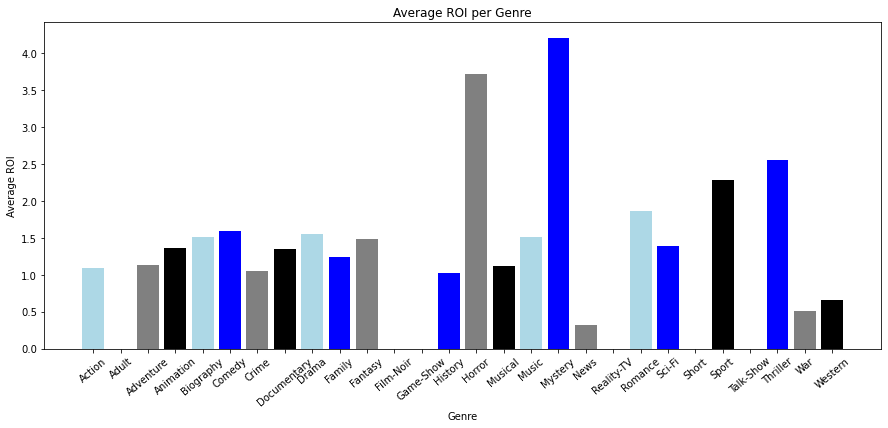

In [164]:
#Graph Average ROI for each Genre
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=genre_list,
    height=flag_mean,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Average ROI per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Average ROI")
plt.xticks(rotation=40);

#### ROI per Genre within Budget

In [177]:
#Create new Dataframe of all films within our Budget with our Whisker plot findings for normal range
prod_budget_max = 97000000
budget_films = movie_df[movie_df["production_budget"]<=prod_budget_max]

In [178]:

#Find the Average ROI for each Genre
bflag_mean = []
for genre in genre_list:
    m = budget_films.loc[budget_films[genre]==1, "ROI"].mean()
    bflag_mean.append(m)
#Zip into dictionary to look at numerically
bgenre_mean = dict(zip(genre_list, bflag_mean))
bgenre_mean

{'Action': 1.105893108379875,
 'Adult': nan,
 'Adventure': 1.1655683684785687,
 'Animation': 1.4791342598566901,
 'Biography': 1.5254504698750797,
 'Comedy': 1.6409535636828214,
 'Crime': 1.0488299151105105,
 'Documentary': 1.357379962072146,
 'Drama': 1.5770052820999212,
 'Family': 1.3245082667223476,
 'Fantasy': 1.6865881030444005,
 'Film-Noir': nan,
 'Game-Show': nan,
 'History': 1.011695333611964,
 'Horror': 3.7872709577359664,
 'Musical': 0.8850298476372679,
 'Music': 1.4895528265875295,
 'Mystery': 4.314135338046905,
 'News': 0.3142880114942529,
 'Reality-TV': nan,
 'Romance': 1.875786160624871,
 'Sci-Fi': 1.4336812406189834,
 'Short': nan,
 'Sport': 2.305342085533553,
 'Talk-Show': nan,
 'Thriller': 2.6698133260839465,
 'War': 0.4949335461557668,
 'Western': 0.6021892189888253}

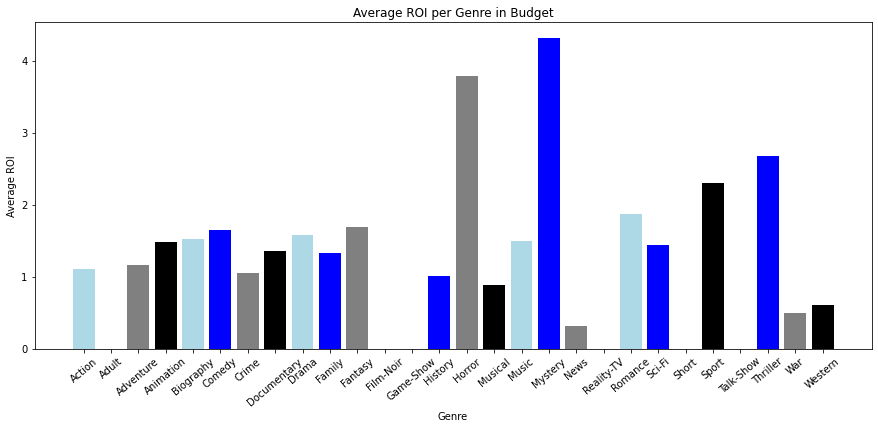

In [180]:
#Graph Average ROI for each Genre
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=genre_list,
    height=bflag_mean,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Average ROI per Genre in Budget")
ax.set_xlabel("Genre")
ax.set_ylabel("Average ROI")
plt.xticks(rotation=40);

#### Count of Genres with Positive ROI

In [181]:
#Create new Dataframe of all films within budget with Positive (greater than 1) domestic ROI
pos_ROI = budget_films[budget_films["ROI"]>1]

In [182]:
#Find the number of each genre within the budget and ROI constraints
flag_sum = []
for genre in genre_list:
    g = sum(pos_ROI[genre])
    flag_sum.append(g)
#Zip into dictionary to look at numbers
genre_counts = dict(zip(genre_list, flag_sum))
genre_counts

{'Action': 115,
 'Adult': 0,
 'Adventure': 82,
 'Animation': 32,
 'Biography': 71,
 'Comedy': 285,
 'Crime': 103,
 'Documentary': 39,
 'Drama': 415,
 'Family': 39,
 'Fantasy': 33,
 'Film-Noir': 0,
 'Game-Show': 0,
 'History': 22,
 'Horror': 113,
 'Musical': 3,
 'Music': 36,
 'Mystery': 83,
 'News': 0,
 'Reality-TV': 0,
 'Romance': 119,
 'Sci-Fi': 37,
 'Short': 0,
 'Sport': 20,
 'Talk-Show': 0,
 'Thriller': 143,
 'War': 8,
 'Western': 2}

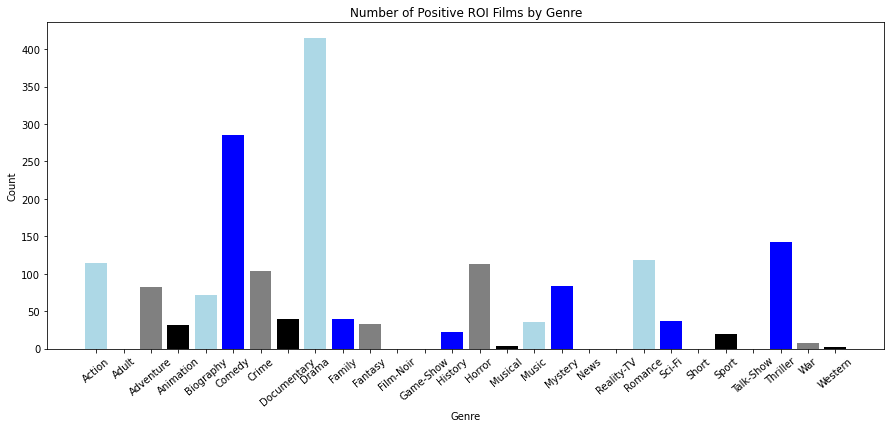

In [183]:
#Graph number of positive ROI films by Genre
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=genre_list,
    height=flag_sum,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Number of Positive ROI Films by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=40);

#### Season with best ROI for Drama within Budget

In [192]:
#Create Dataframe of only Drama films within budget
drama_films = budget_films[budget_films["Drama"]==1]
#Organize by season
season_list = ["Spring", "Summer", "Fall", "Winter"]
season_mean = []
for season in season_list:
    s = drama_films.loc[drama_films["season"]==season, "ROI"].mean()
    season_mean.append(s)
#Zip into dictionary to look at numerically
season_ROI = dict(zip(season_list, season_mean))
season_ROI

{'Spring': 1.3547101937685702,
 'Summer': 2.0757767834274388,
 'Fall': 1.406969051307265,
 'Winter': 1.5548582030160796}

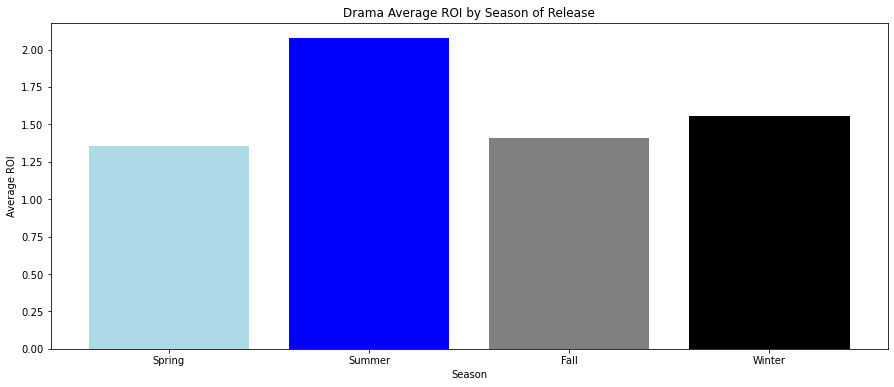

In [193]:
#Graph
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(
    x=season_list,
    height=season_mean,
    color=['lightblue', 'blue', 'gray', 'black'])
ax.set_title("Drama Average ROI by Season of Release")
ax.set_xlabel("Season")
ax.set_ylabel("Average ROI");